<a href="https://colab.research.google.com/github/Muosvr/fastai_presentation/blob/master/Fastai_v1_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using Fast.ai v1_halloween edition

Let's find out whether that house in the picture is haunted or not

# Using Google Colab

**Basic shortcuts**

* Create a cell above: ctrl + m and then a
* Create a cell below: ctrl + m and then b
* Delete a cell : ctrl + m and then d
* To run a cell : shift + enter (or ctrl + enter if you don't want focus to jump to the next cell)

For more go to tools -> keyboard shortcuts


# Getting Image data

Let's get some images! The javascript code below helps you scrape the urls from Google Image into a file. Just copy into browser counsole and run the code once you have searched for the images and it should generate a file for download


Javascript for scraping from Google Image in browser
```
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```



We will first install Pytorch and than the fastai library. Fastai is built ontop of Pytorch which is itself a deep learning library that allows for  matrix computation on the GPU that is necessary to accelerate deep learning training

In [2]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 585.6MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61b62000 @  0x7f32ad3b22a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070


In [3]:
!pip install fastai

    100% |████████████████████████████████| 112kB 3.1MB/s 
    100% |████████████████████████████████| 9.0MB 3.5MB/s 
    100% |████████████████████████████████| 61kB 21.1MB/s 
    100% |████████████████████████████████| 1.0MB 14.6MB/s 
    100% |████████████████████████████████| 112kB 26.9MB/s 
    100% |████████████████████████████████| 112kB 26.5MB/s 
    100% |████████████████████████████████| 2.2MB 10.8MB/s 
  Running setup.py bdist_wheel for prometheus-client ... - \ done
  Stored in directory: /root/.cache/pip/wheels/b9/96/bc/e2acadc6bbfe57a1f631a34ca4ce6dd057af059b8d6878202b
Successfully built prometheus-client
google-colab 0.0.1a1 has requirement notebook~=5.2.0, but you'll have notebook 5.7.0 which is incompatible.
torchvision-nightly 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.15 which is incompatible.
  Found existing instal

Here we will import the necessary library for the notebook to use

In [0]:
from fastai import *
from fastai.vision import *
import os

The code below allows yoou to upload files from your computer to this notebook. It is copied from sample code snipets from Google colab. You can find it by searching "upload files" on the side bar

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving house.txt to house.txt
Saving haunted_house.txt to haunted_house.txt
Saving test_set.txt to test_set.txt
User uploaded file "house.txt" with length 84000 bytes
User uploaded file "haunted_house.txt" with length 78176 bytes
User uploaded file "test_set.txt" with length 9139 bytes


Google colab has some basic bash comman build in such as ls, mkdir, and rm. For more advanced commands you can access everything you can do in a terminal by prepending a "!" to the codes. That was how we installed all the packages ealier.

In [7]:
ls

haunted_house.txt  house.txt  sample_data/  test_set.txt


Now let's create an array of classes and use that to create two folders and downloard about 200 images into each category

In [0]:
classes = ['haunted_house', 'house']

In [0]:
!mkdir data
path = Path('data') #creating a path object. Path is unqiue class to fastai, it makes it easier to manipulate file paths. 

Whenever you see a function you don't understand, put ? in front of it to see a basic explaination and ?? to see a more thorough explaination as well as link to the source code. You can also do doc(something_you_don't_understand) to look at the documentation

In [0]:
??Path

In [0]:
path. #place cursor after the "." and hit tap to see a list of properties you can access in the path object you created
      #This adds functionality to the ordinary path string

In [19]:
#create folders and download images from urls
for name in classes:
  url_file = name + '.txt'
  dest = 'data/' + name
  if not os.path.exists(dest):
    os.makedirs(dest)
  download_images(url_file, dest, max_pics=200)

Error https://carnagehauntedhouse.com/wp-content/uploads/2017/05/crnage-image-glowing-eyes.png 'content-length'
Error https://r.hswstatic.com/w_907/gif/podcasts/missedinhistory-podcasts-wp-content-uploads-sites-99-2015-07-Haunted_Mansion_Exterior.jpg 'content-length'
Error https://www.cityofthedeadhaunt.com/2018/img/Avatar.jpg 'content-length'
Error https://cdn.abcotvs.com/dip/images/1042201_102015-cc-McConnell-Thumb-3.jpg?w=630&r=16:9 'content-length'
Error http://www.hellsgate.com/gallery-home-2016/HellsGate-Haunted-House_07.jpg 'content-length'
Error https://imagesvc.timeincapp.com/v3/mm/image?url=https%3A%2F%2Fpeopledotcom.files.wordpress.com%2F2018%2F09%2Fstranger-things-5.jpg%3Fw%3D2000&w=700&c=sc&poi=face&q=85 'content-length'
Error https://www.thrillvania.com/wp-content/uploads/2015/09/7.jpg 'content-length'
Error http://mediad.publicbroadcasting.net/p/wusf/files/styles/x_large/public/201610/10-30derelicthouseEDIT.jpg 'content-length'
Error https://imagesvc.timeincapp.com/v3/mm

Error https://images.pexels.com/photos/462358/pexels-photo-462358.jpeg?cs=srgb&dl=garden-house-lawn-462358.jpg&fm=jpg 'content-length'
Error https://images.pexels.com/photos/106399/pexels-photo-106399.jpeg?cs=srgb&dl=architecture-beautiful-exterior-106399.jpg&fm=jpg 'content-length'
Error https://images.pexels.com/photos/186077/pexels-photo-186077.jpeg?cs=srgb&dl=architecture-building-driveway-186077.jpg&fm=jpg 'content-length'
Error https://fm.cnbc.com/applications/cnbc.com/resources/img/editorial/2018/08/08/105383459-1533725826915gettyimages-1001904568.530x298.jpeg?v=1533725885 'content-length'
Error https://cdn.abcotvs.com/dip/images/4041475_082318-kgo-sunset-idea-house-front-img.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=2062985863843245&get_thumbnail=1 'content-length'
Error https://fm.cnbc.com/applications/cnbc.com/resources/img/editorial/2016/11/17/104115263-045-stone-house.1910x1000.jpg 'content-length'
Error http://www.new-home.fr/

Note the "!" make turns the next three cells into bash commands

In [20]:
!ls data

haunted_house  house


In [21]:
!cd data/haunted_house; ls | wc -l #another bash command. This counts how many files there are in the directory
#note the ";" in above code separate out two lines of code so they can all be written in one line following the "!"

190


In [22]:
!cd data/house; ls | wc -l #same as above, for a different directory

188


In [23]:
#download test set
download_images('test_set.txt', 'test')

Error https://images.pexels.com/photos/259597/pexels-photo-259597.jpeg?auto=compress&cs=tinysrgb&h=350 'content-length'
Error https://bloximages.newyork1.vip.townnews.com/newspressnow.com/content/tncms/assets/v3/editorial/6/3e/63e6ad4d-b9da-5ded-b428-2a5737c52530/5bcfd9a377b47.image.jpg?resize=400%2C300 'content-length'
Error https://cdn.abcotvs.com/dip/images/4041889_082318-kgo-sunset-house-img_Image_00-00-22,03.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=556802944353309 'content-length'
Error http://tejaratebartar.net/wp-content/uploads/2018/07/13-scariest-haunted-houses-in-america-business-insider-for-real-haunted-houses-intended-for-house.jpg 'content-length'
Error https://www.thrillvania.com/wp-content/uploads/2014/03/14big-600x600.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=200299390128568 'content-length'
Error http://88designbox.com/upload/2016/06/08/flexhouse-modern-house-in-zurich.jpg HT

Next we need to varify each image to make sure it is not corrupted to prevent interruption during training. Any invalid images will be automatically deleted

In [26]:
#verify training image data
for name in classes:
  print(name)
  verify_images(path/name, delete=True, max_workers=8)

haunted_house


cannot identify image file '/content/data/haunted_house/00000017.jpg'
cannot identify image file '/content/data/haunted_house/00000198.jpg'
cannot identify image file '/content/data/haunted_house/00000020.jpg'
cannot identify image file '/content/data/haunted_house/00000027.jpg'
cannot identify image file '/content/data/haunted_house/00000099.jpg'
cannot identify image file '/content/data/haunted_house/00000132.jpg'
cannot identify image file '/content/data/haunted_house/00000087.jpg'
cannot identify image file '/content/data/haunted_house/00000006.jpg'
house


cannot identify image file '/content/data/house/00000007.jpg'
cannot identify image file '/content/data/house/00000030.jpg'
cannot identify image file '/content/data/house/00000070.jpg'
cannot identify image file '/content/data/house/00000013.jpg'
cannot identify image file '/content/data/house/00000149.jpg'
cannot identify image file '/content/data/house/00000168.jpg'
cannot identify image file '/content/data/house/00000184.jpg'
cannot identify image file '/content/data/house/00000186.jpg'
cannot identify image file '/content/data/house/00000060.jpg'
cannot identify image file '/content/data/house/00000174.jpg'
cannot identify image file '/content/data/house/00000163.jpg'
cannot identify image file '/content/data/house/00000093.jpg'
cannot identify image file '/content/data/house/00000099.jpg'
cannot identify image file '/content/data/house/00000077.jpg'
cannot identify image file '/content/data/house/00000121.jpg'


In [27]:
#verify testing image data
verify_images('test', delete=True)

cannot identify image file '/content/test/00000072.jpg'
cannot identify image file '/content/test/00000027.jpg'
cannot identify image file '/content/test/00000043.jpg'
cannot identify image file '/content/test/00000011.jpg'
cannot identify image file '/content/test/00000008.jpg'


# View data

Now let's look at the images. The ImageDataBunch funccton below creates a data object for training. For now you just need to understand that you need to pass it the a path to the data, tell it where the training data is (In this case, it's "." for the root of the path). And the valid_pct tells the program what percentage of data is used to validate the results during training. This allows you to visualize how well the model is being trained in the process. For a small set of data this is usually set to 20%

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [29]:
data.classes #the data object allows you to see its properties like the catorgories it contrain

['haunted_house', 'house']

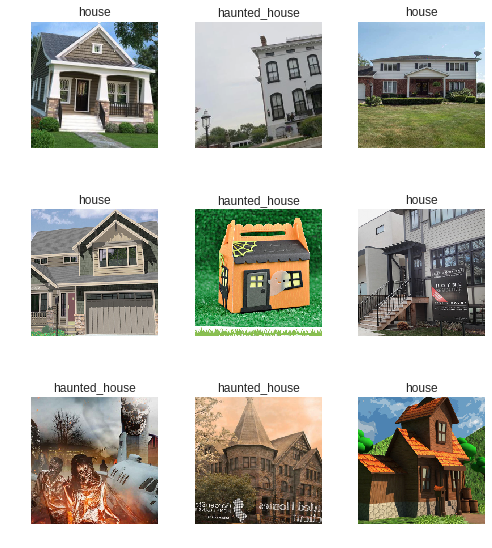

In [30]:
data.show_batch(rows=3, figsize=(7,8))

In [31]:
#more properties from the data object: 
data.c, len(data.train_ds), len(data.valid_ds) #number of classes, length of training set, and length of validation set

(2, 275, 80)

This is a good place to talk about batch size. It is the number of images that are passed on to the GPU to be processed at a time. Because the GPU has so many cores, it can process more than one image at a time, and in this case we give it 64 images at once so it will save a lot of training time. This number is dependent on the memory size of the GPU, normally you can try the even multiple of 32 such as 32, 64, 128, 256

In [0]:
bs = 64 #batch size

# Training

Now onto the fun part! The two lines below creates a nerual net structure and trains it for 4 cyce. Each cycle contains one epoch, which means one pass of the entire training set. Here "create_cnn" creates a type of model called the convolutional neral net(CNN), which is great for image recognition. First we pass it the data object we created previously, then the archetecture for the model, which in this case is a resnet34, and finally the metrics denotes how we want to monitor the model during training. 

Here Resnet34 is a CNN architecture create by Microsoft. You can also try other architecture such as Resnet50 which is a deeper more complex version(takes a little longer to train but might improve accuracy). This is where the magic of fastai lies, as it lets you use the models that are developed by cutting edge research. If you are interested you can read the original research paper [here](https://arxiv.org/pdf/1512.03385.pdf).

From the output we can see that we are getting an error_rate about 11% to 12%. Which means there's a bout 1 in 10 chance it have a wrong prediction, this can be because we did not really clean the data really well. You can also try to train for a few more cycles to see if you can get a smaller error rate

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate) #This will download the specified archetecture and create a model object for training

In [49]:
learn.fit_one_cycle(4) #Training for 4 cycles

Total time: 01:37
epoch  train_loss  valid_loss  error_rate
1      0.228901    0.274268    0.112500    (00:24)
2      0.187960    0.283102    0.087500    (00:24)
3      0.167028    0.270995    0.087500    (00:25)
4      0.170707    0.266058    0.087500    (00:24)



In [0]:
learn.save('stage-1') #This will save our model to file for later use

#Examining the model

Now that we have trained a model, let's see how it is doing. The first two code cells below creates an object for us to analyze the results than show us the most wrong predictions the model made during training, meaning that when model is confident but wrong. This help us understand where the model is failing so we can potentially improve it. As you can see, because we did not spend a lot of time cleaning the data we scrap from google, sometimes the model is wrong sinply because the image is really hard to tell or that it is labeled incorrectly in the first place.

In [0]:
interp = ClassificationInterpretation.from_learner(learn) #create an object to analyze result from the learn object we created earlier

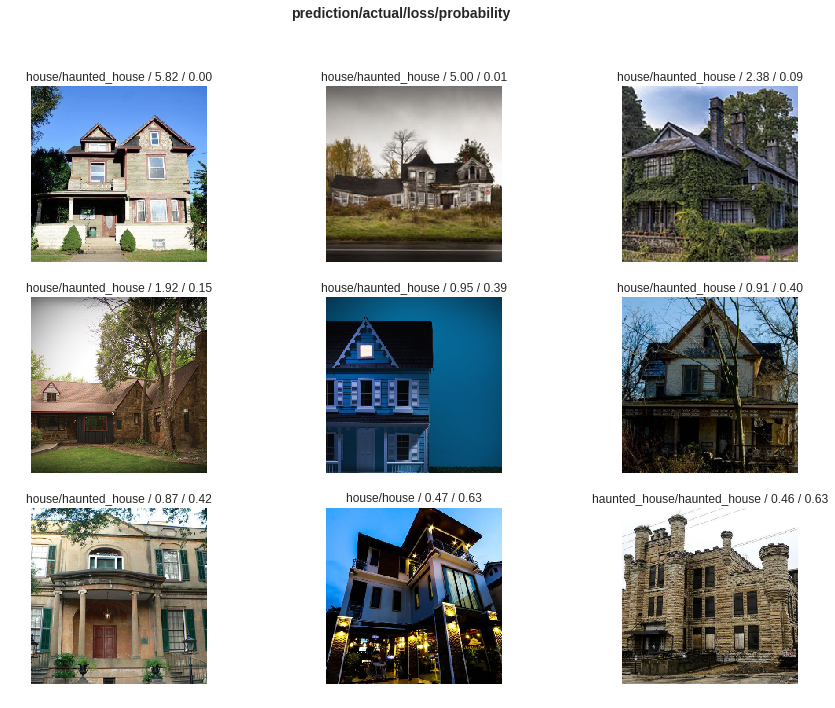

In [51]:
interp.plot_top_losses(9, figsize=(15,11)) #show photos that the nerual net is most wrong about

In [52]:
data.classes

['haunted_house', 'house']

Now it's time to put out model to the test and see if it indeed can do its job recognizing a haunted house. The code below picks an image in random from the test set we create earlier and try to predict if it is a haunted house or not.

In [0]:
import glob
filenames = glob.glob('test/*') #We use glob, a python library, to help find the names of every image in the test folder and return them in an array

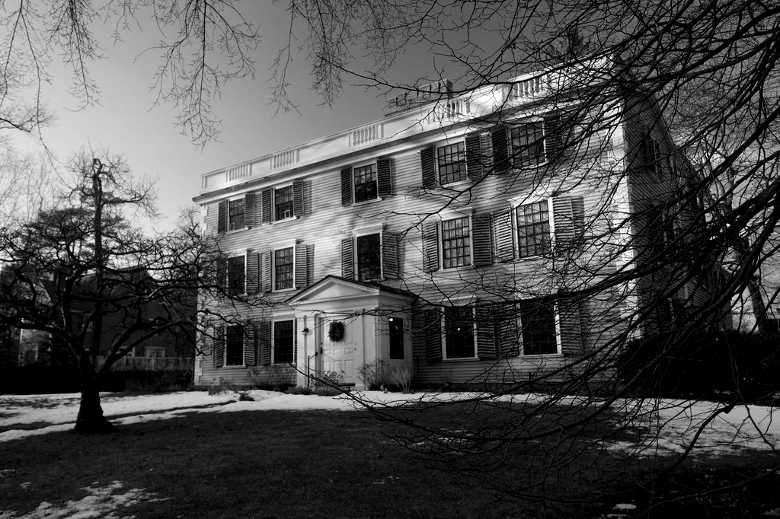

In [65]:
random_file = random.choice(filenames) #chose a random file from the filenames array
img = open_image(random_file) #opens the image
img

In [66]:
pre_class, pred_idx, outputs = learn.predict(img) #make prediction.
pre_class

'haunted_house'